<a href="https://colab.research.google.com/github/sandrarajp/UAE/blob/main/UAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_segments.csv to customer_segments (1).csv
Saving kpi_mapping_vision_2030.csv to kpi_mapping_vision_2030 (1).csv
Saving macro_indicators_uae_monthly.csv to macro_indicators_uae_monthly (1).csv
Saving monthly_kpis.csv to monthly_kpis (1).csv
Saving policy_events.csv to policy_events (1).csv
Saving sme_profiles.csv to sme_profiles (1).csv


In [ ]:
import pandas as pd

sme   = pd.read_csv("sme_profiles.csv")
kpis  = pd.read_csv("monthly_kpis.csv", parse_dates=["month"])
macro = pd.read_csv("macro_indicators_uae_monthly.csv", parse_dates=["month"])


In [ ]:
print(sme.head())
print(kpis.head())
print(macro.head())


      sme_id         emirate       industry          subindustry  employees  \
0  SME100000           Dubai  Manufacturing  Light Manufacturing         33   
1  SME100001  Ras Al Khaimah    Hospitality          Restaurants         47   
2  SME100002         Sharjah      Logistics              Courier          5   
3  SME100003           Dubai   Construction          Contracting         13   
4  SME100004       Abu Dhabi  Manufacturing            Furniture          1   

   annual_revenue_aed  founded_year license_type trade_license_issuer  \
0            200000.0          2011    Free Zone      JAFZA Free Zone   
1            200000.0          2023    Free Zone              RAK DED   
2            200000.0          1998    Free Zone       DMCC Free Zone   
3            200000.0          2020     Mainland       SDED (Sharjah)   
4            200000.0          2003     Mainland            Ajman DED   

  owner_nationality_group  female_owned  exporter  digital_adoption_score  
0         

In [ ]:
# SMEs
print("SME Dataset Info:")
print(sme.info())
print("\nMissing values:\n", sme.isnull().sum())
print("Duplicates:", sme.duplicated().sum())

# KPIs
print("\nKPI Dataset Info:")
print(kpis.info())
print("\nMissing values:\n", kpis.isnull().sum())
print("Duplicates:", kpis.duplicated().sum())

# Macro Indicators
print("\nMacro Dataset Info:")
print(macro.info())
print("\nMissing values:\n", macro.isnull().sum())
print("Duplicates:", macro.duplicated().sum())


SME Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sme_id                   600 non-null    object 
 1   emirate                  600 non-null    object 
 2   industry                 600 non-null    object 
 3   subindustry              600 non-null    object 
 4   employees                600 non-null    int64  
 5   annual_revenue_aed       600 non-null    float64
 6   founded_year             600 non-null    int64  
 7   license_type             600 non-null    object 
 8   trade_license_issuer     600 non-null    object 
 9   owner_nationality_group  600 non-null    object 
 10  female_owned             600 non-null    int64  
 11  exporter                 600 non-null    int64  
 12  digital_adoption_score   600 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 61.1+ KB
None

In [ ]:
import pandas as pd

def clean_dataframe(df, date_cols=None, category_cols=None):
    df = df.copy()

    # 1. Handle missing values
    for col in df.select_dtypes(include="number").columns:
        df[col] = df[col].fillna(df[col].median())
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].fillna(df[col].mode()[0])

    # 2. Ensure numeric columns are numeric
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col] = pd.to_numeric(df[col])
            except:
                pass  # keep as string if not convertible

    # 3. Standardize categorical columns
    if category_cols:
        for col in category_cols:
            if col in df.columns:
                df[col] = df[col].str.strip().str.lower()

    # 4. Convert date columns
    if date_cols:
        for col in date_cols:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors="coerce")

    # 5. Remove duplicates
    df = df.drop_duplicates()

    return df


In [ ]:
sme = clean_dataframe(
    sme,
    category_cols=["industry", "emirate", "license_type"]  # adjust to actual names
)

kpis = clean_dataframe(
    kpis,
    date_cols=["month"],
    category_cols=["kpi_type"]  # adjust if available
)

macro = clean_dataframe(
    macro,
    date_cols=["month"],
    category_cols=["indicator"]  # adjust if available
)


In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Assuming you already have these loaded & cleaned)
# sme = pd.read_csv("cleaned_sme_profiles.csv")
# kpis = pd.read_csv("cleaned_monthly_kpis.csv")
# macro = pd.read_csv("cleaned_macro_indicators_uae_monthly.csv")

# 1. Overview of datasets
print("SME Profiles:\n", sme.head())
print("\nKPIs:\n", kpis.head())
print("\nMacro Indicators:\n", macro.head())


SME Profiles:
       sme_id         emirate       industry          subindustry  employees  \
0  SME100000           dubai  manufacturing  Light Manufacturing         33   
1  SME100001  ras al khaimah    hospitality          Restaurants         47   
2  SME100002         sharjah      logistics              Courier          5   
3  SME100003           dubai   construction          Contracting         13   
4  SME100004       abu dhabi  manufacturing            Furniture          1   

   annual_revenue_aed  founded_year license_type trade_license_issuer  \
0            200000.0          2011    free zone      JAFZA Free Zone   
1            200000.0          2023    free zone              RAK DED   
2            200000.0          1998    free zone       DMCC Free Zone   
3            200000.0          2020     mainland       SDED (Sharjah)   
4            200000.0          2003     mainland            Ajman DED   

  owner_nationality_group  female_owned  exporter  digital_adoption_sco

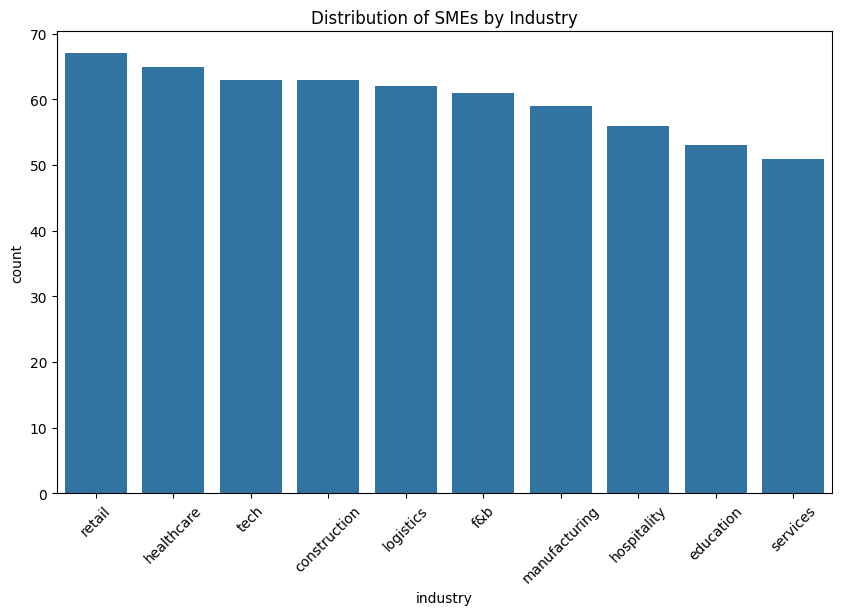

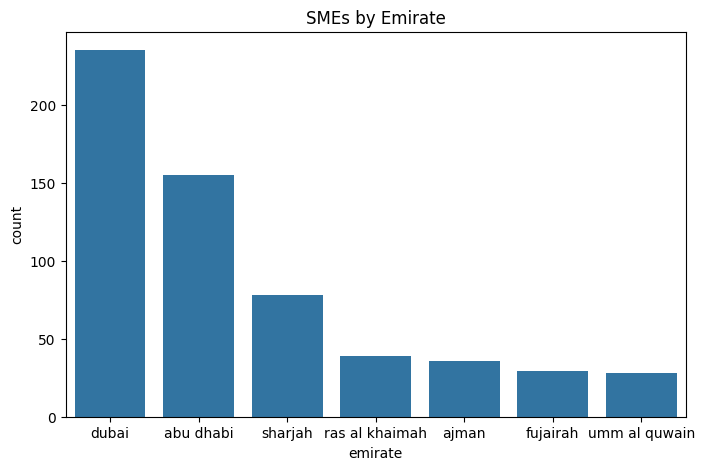

In [ ]:
# Industry Distribution
plt.figure(figsize=(10,6))
sns.countplot(data=sme, x="industry", order=sme["industry"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of SMEs by Industry")
plt.show()

# Emirates Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=sme, x="emirate", order=sme["emirate"].value_counts().index)
plt.title("SMEs by Emirate")
plt.show()


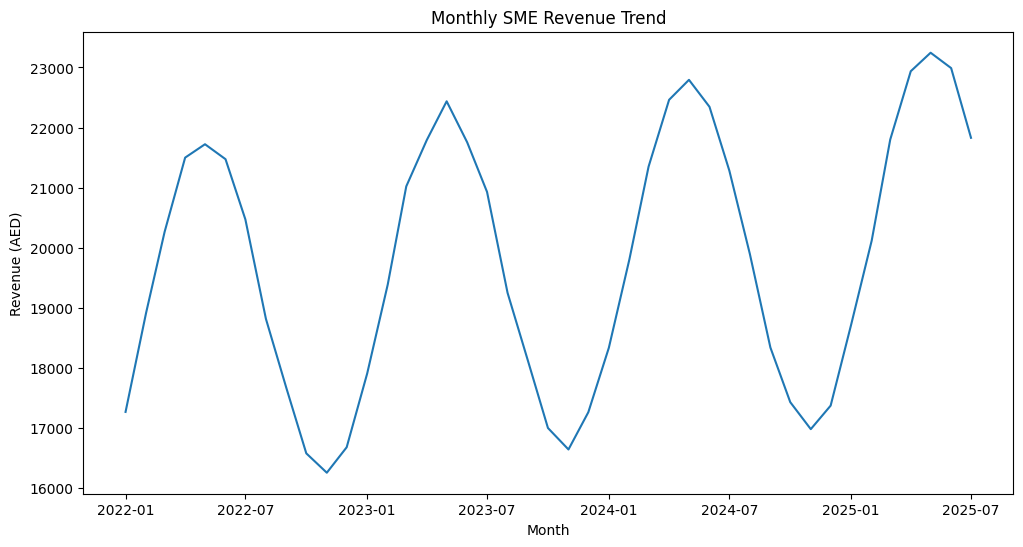

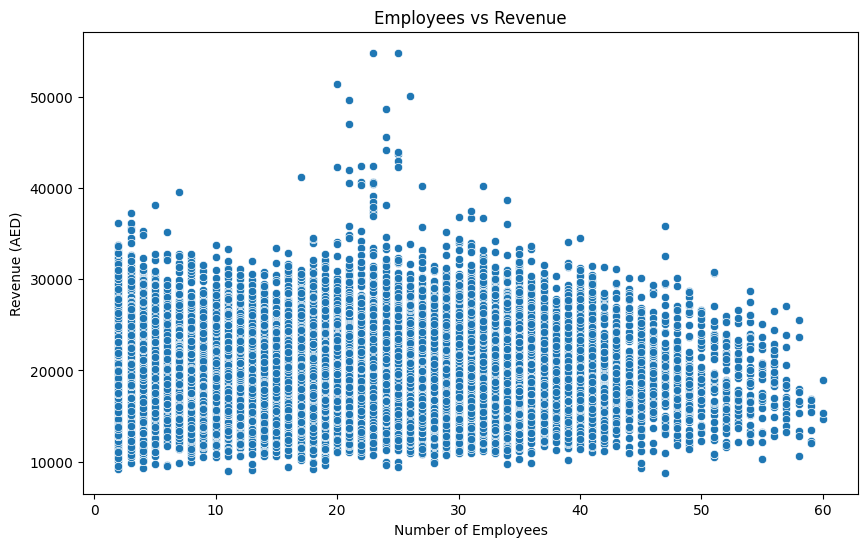

In [ ]:
# Revenue Trend
plt.figure(figsize=(12,6))
sns.lineplot(data=kpis, x="month", y="revenue_aed", errorbar=None)  # updated column
plt.title("Monthly SME Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (AED)")
plt.show()

# Employees vs Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=kpis, x="staff_count", y="revenue_aed")  # updated columns
plt.title("Employees vs Revenue")
plt.xlabel("Number of Employees")
plt.ylabel("Revenue (AED)")
plt.show()


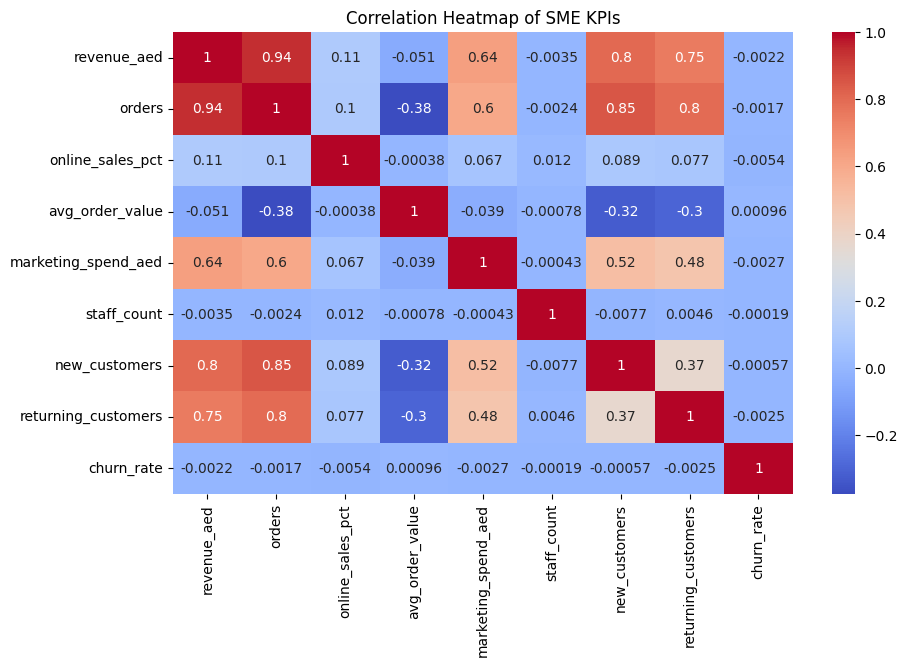

In [ ]:
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(10,6))
sns.heatmap(kpis.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of SME KPIs")
plt.show()


In [ ]:
print(merged.columns)


Index(['sme_id', 'month', 'revenue_aed', 'orders', 'online_sales_pct',
       'avg_order_value', 'marketing_spend_aed', 'staff_count',
       'new_customers', 'returning_customers', 'churn_rate',
       'cpi_index_2021_base', 'non_oil_pmi', 'policy_rate_proxy_pct',
       'brent_usd_per_bbl', 'dubai_visitors_millions', 'usd_aed_fx'],
      dtype='object')


In [ ]:
sme.to_csv("sme_cleaned.csv", index=False)
kpis.to_csv("kpis_cleaned.csv", index=False)
macro.to_csv("macro_cleaned.csv", index=False)


In [ ]:
import pandas as pd

sme = pd.read_csv("sme_cleaned.csv")
kpis = pd.read_csv("kpis_cleaned.csv")
macro = pd.read_csv("macro_cleaned.csv")


In [ ]:
print("SME Columns:", sme.columns.tolist())
print("KPIs Columns:", kpis.columns.tolist())
print("Macro Columns:", macro.columns.tolist())


SME Columns: ['sme_id', 'emirate', 'industry', 'subindustry', 'employees', 'annual_revenue_aed', 'founded_year', 'license_type', 'trade_license_issuer', 'owner_nationality_group', 'female_owned', 'exporter', 'digital_adoption_score']
KPIs Columns: ['sme_id', 'month', 'revenue_aed', 'orders', 'online_sales_pct', 'avg_order_value', 'marketing_spend_aed', 'staff_count', 'new_customers', 'returning_customers', 'churn_rate']
Macro Columns: ['month', 'cpi_index_2021_base', 'non_oil_pmi', 'policy_rate_proxy_pct', 'brent_usd_per_bbl', 'dubai_visitors_millions', 'usd_aed_fx']


In [ ]:
merged = pd.merge(kpis, macro, on="month", how="inner")
print("Merged Columns:", merged.columns.tolist())
print(merged.head())


Merged Columns: ['sme_id', 'month', 'revenue_aed', 'orders', 'online_sales_pct', 'avg_order_value', 'marketing_spend_aed', 'staff_count', 'new_customers', 'returning_customers', 'churn_rate', 'cpi_index_2021_base', 'non_oil_pmi', 'policy_rate_proxy_pct', 'brent_usd_per_bbl', 'dubai_visitors_millions', 'usd_aed_fx']
      sme_id       month  revenue_aed  orders  online_sales_pct  \
0  SME100000  2022-01-01     26599.45      91             0.482   
1  SME100000  2022-02-01     23660.11      86             0.588   
2  SME100000  2022-03-01     21345.29      69             0.507   
3  SME100000  2022-04-01     28944.64      97             0.519   
4  SME100000  2022-05-01     33401.14     109             0.433   

   avg_order_value  marketing_spend_aed  staff_count  new_customers  \
0           292.30              2416.76           31             56   
1           275.12              2731.61           28             52   
2           309.35              1016.23           30             42

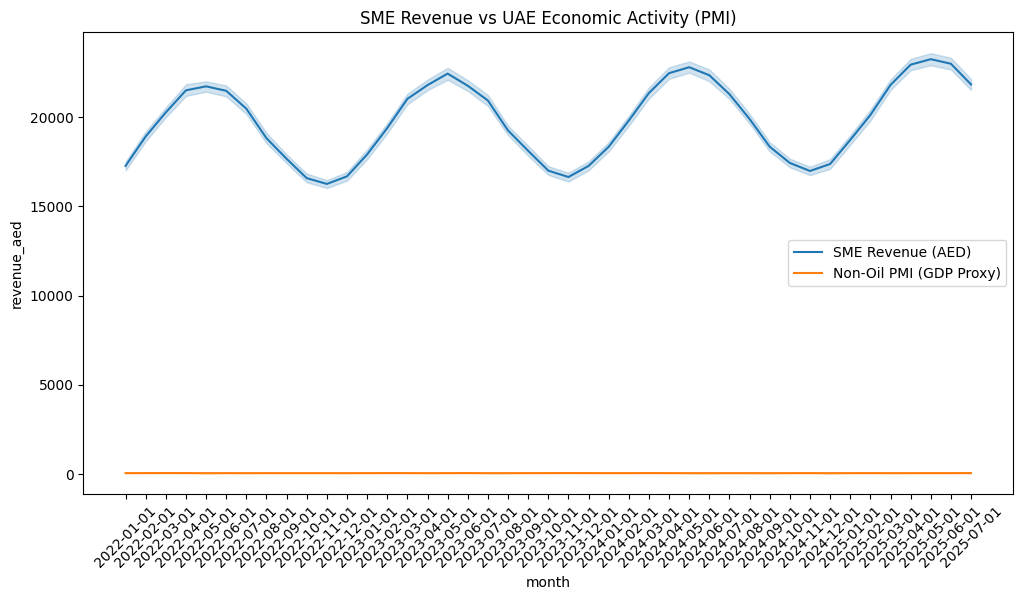

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Revenue vs Economic Activity (PMI)
if "revenue_aed" in merged.columns and "non_oil_pmi" in merged.columns:
    plt.figure(figsize=(12,6))
    sns.lineplot(data=merged, x="month", y="revenue_aed", label="SME Revenue (AED)")
    sns.lineplot(data=merged, x="month", y="non_oil_pmi", label="Non-Oil PMI (GDP Proxy)")
    plt.title("SME Revenue vs UAE Economic Activity (PMI)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()
else:
    print("Check column names! 'revenue_aed' or 'non_oil_pmi' not found.")


In [ ]:
# Correlation between revenue and PMI (GDP proxy)
corr = merged["revenue_aed"].corr(merged["non_oil_pmi"])
print(f"Correlation between SME Revenue and GDP Proxy (PMI): {corr:.2f}")


Correlation between SME Revenue and GDP Proxy (PMI): -0.02


In [ ]:
# Flag months where revenue is above median but PMI is below median
high_rev_low_gdp = merged[
    (merged["revenue_aed"] > merged["revenue_aed"].median()) &
    (merged["non_oil_pmi"] < merged["non_oil_pmi"].median())
]

print("Months with high SME revenue but low GDP activity (PMI):")
print(high_rev_low_gdp[["month", "revenue_aed", "non_oil_pmi"]])


Months with high SME revenue but low GDP activity (PMI):
            month  revenue_aed  non_oil_pmi
0      2022-01-01     26599.45        50.95
4      2022-05-01     33401.14        47.51
6      2022-07-01     23314.66        49.83
8      2022-09-01     19862.74        50.62
9      2022-10-01     20854.06        50.49
...           ...          ...          ...
25718  2022-05-01     21326.38        47.51
25743  2024-06-01     20669.44        48.16
25785  2024-05-01     20815.27        49.18
25789  2024-09-01     19571.49        48.73
25796  2025-04-01     19768.01        50.59

[5719 rows x 3 columns]


In [ ]:
corr_staff = merged["revenue_aed"].corr(merged["staff_count"])
print(f"Correlation between Revenue and Staff Count: {corr_staff:.2f}")


Correlation between Revenue and Staff Count: -0.00


In [ ]:
corr_orders = merged["revenue_aed"].corr(merged["orders"])
print(f"Correlation between Revenue and Orders: {corr_orders:.2f}")


Correlation between Revenue and Orders: 0.94


In [ ]:
corr_churn = merged["revenue_aed"].corr(merged["churn_rate"])
print(f"Correlation between Revenue and Churn Rate: {corr_churn:.2f}")


Correlation between Revenue and Churn Rate: -0.00


In [ ]:
merged["marketing_lag1"] = merged["marketing_spend_aed"].shift(1)
print(merged[["month","revenue_aed","marketing_spend_aed","marketing_lag1"]].head())


        month  revenue_aed  marketing_spend_aed  marketing_lag1
0  2022-01-01     26599.45              2416.76             NaN
1  2022-02-01     23660.11              2731.61         2416.76
2  2022-03-01     21345.29              1016.23         2731.61
3  2022-04-01     28944.64              1907.35         1016.23
4  2022-05-01     33401.14              3156.75         1907.35


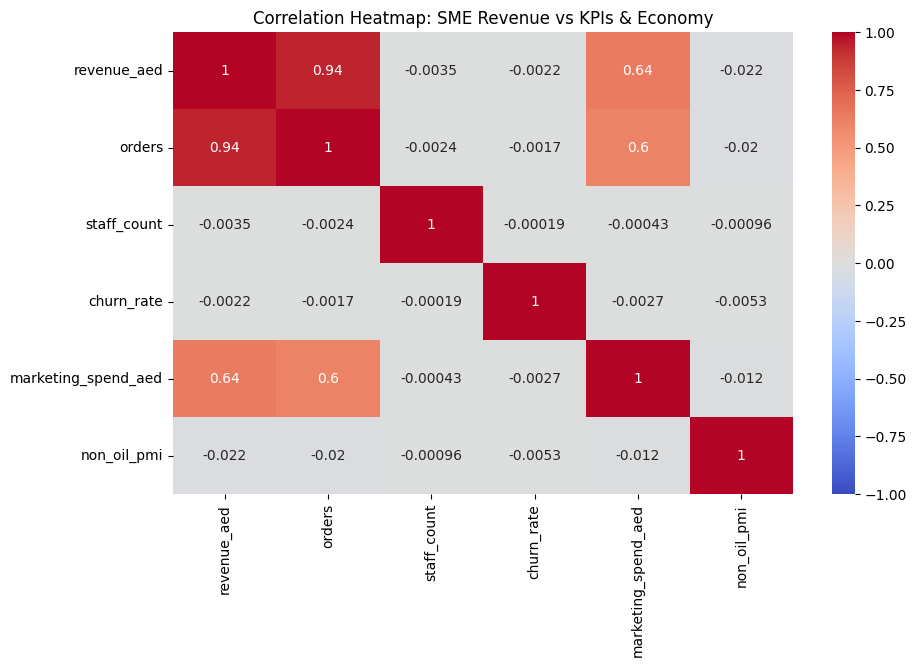

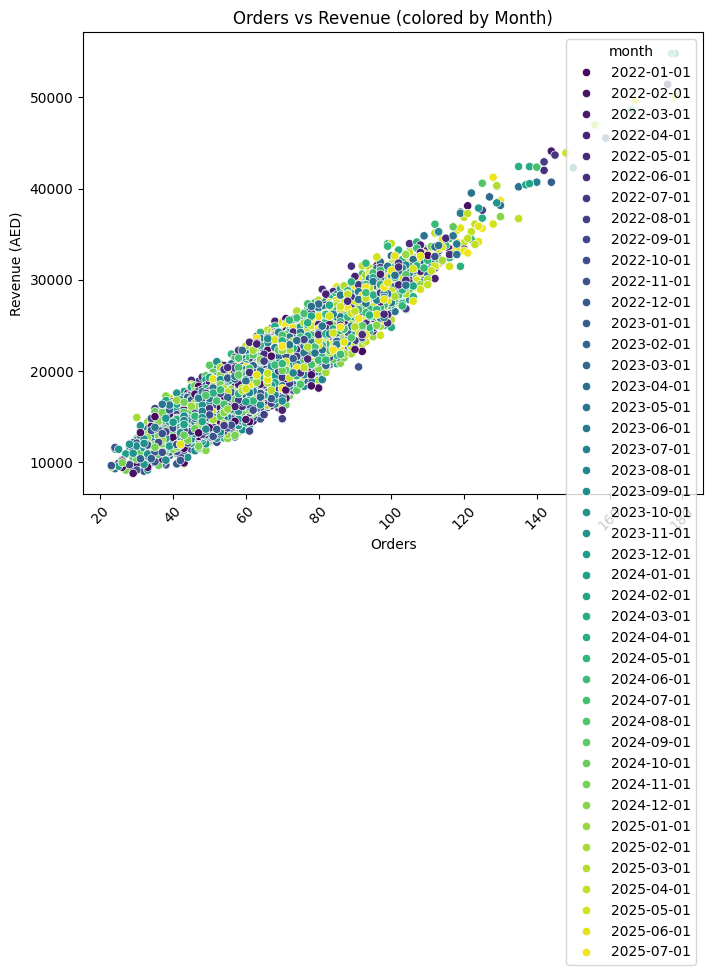

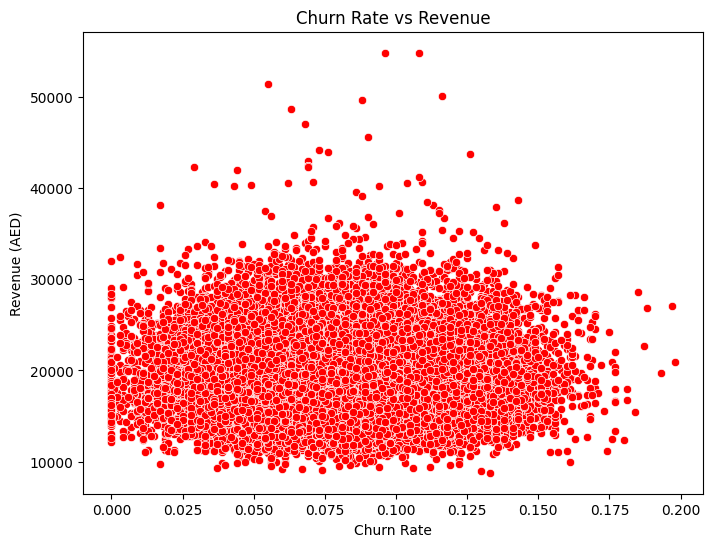

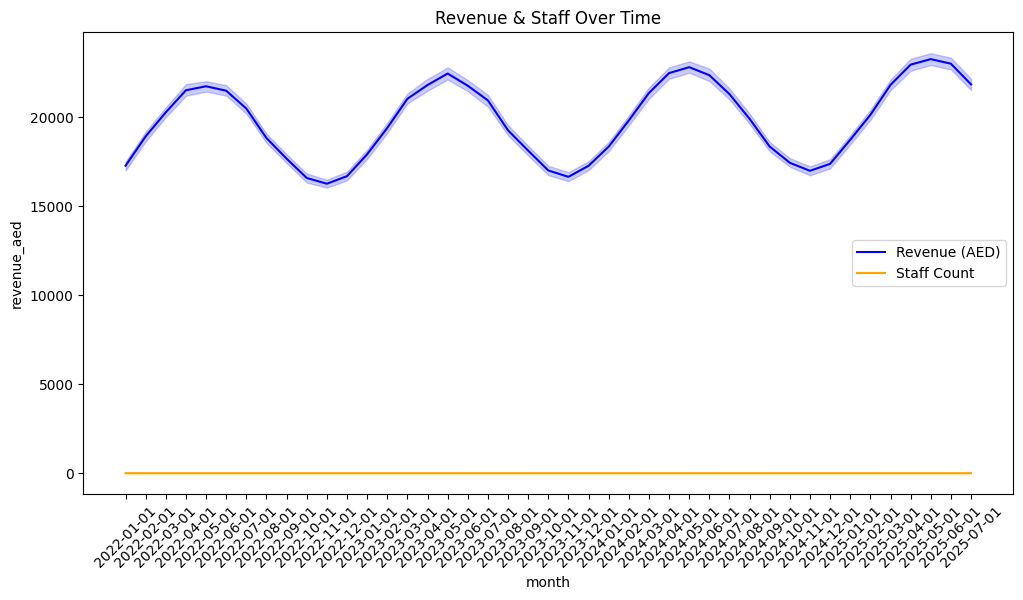

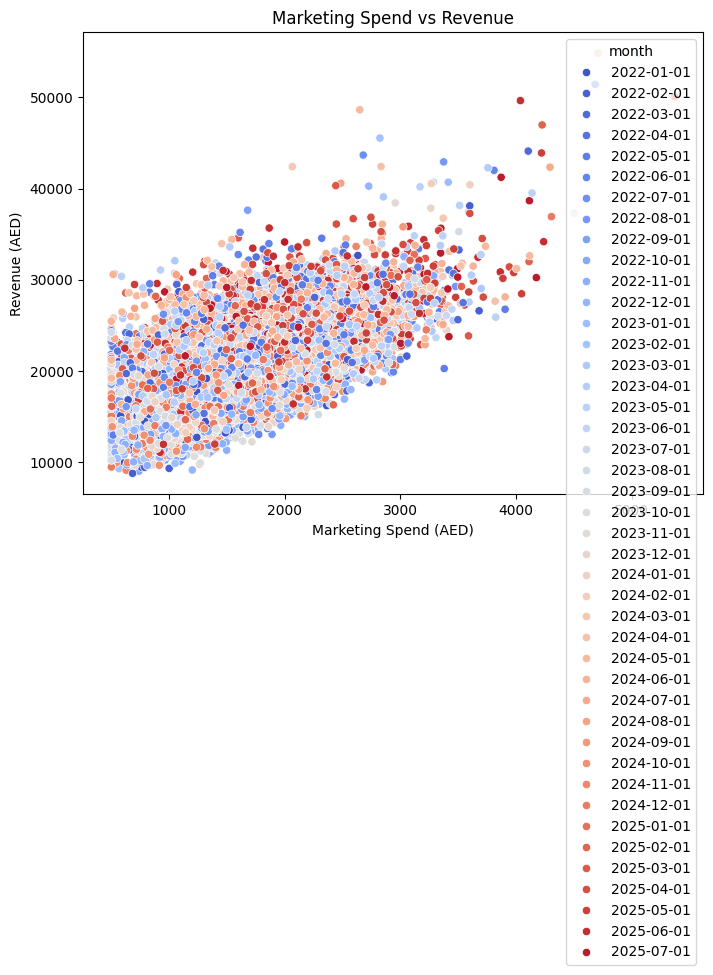

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    merged[["revenue_aed","orders","staff_count","churn_rate","marketing_spend_aed","non_oil_pmi"]].corr(),
    annot=True, cmap="coolwarm", vmin=-1, vmax=1
)
plt.title("Correlation Heatmap: SME Revenue vs KPIs & Economy")
plt.show()

# 2. Revenue vs Orders (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="orders", y="revenue_aed", hue="month", palette="viridis")
plt.title("Orders vs Revenue (colored by Month)")
plt.xlabel("Orders")
plt.ylabel("Revenue (AED)")
plt.xticks(rotation=45)
plt.show()

# 3. Revenue vs Churn Rate (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="churn_rate", y="revenue_aed", color="red")
plt.title("Churn Rate vs Revenue")
plt.xlabel("Churn Rate")
plt.ylabel("Revenue (AED)")
plt.show()

# 4. Revenue & Staff over Time (Line Plot)
plt.figure(figsize=(12,6))
sns.lineplot(data=merged, x="month", y="revenue_aed", label="Revenue (AED)", color="blue")
sns.lineplot(data=merged, x="month", y="staff_count", label="Staff Count", color="orange")
plt.title("Revenue & Staff Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 5. Revenue vs Marketing Spend (Scatter)
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged, x="marketing_spend_aed", y="revenue_aed", hue="month", palette="coolwarm")
plt.title("Marketing Spend vs Revenue")
plt.xlabel("Marketing Spend (AED)")
plt.ylabel("Revenue (AED)")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Features and target
X = merged[["orders", "churn_rate", "staff_count", "marketing_spend_aed", "non_oil_pmi"]]
y = merged["revenue_aed"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

# Feature importance (coefficients)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print(coefficients)


R² Score: 0.8934943420744245
MAE: 1091.2226377549237
RMSE: 1371.030223110564
               Feature  Coefficient
0               orders   246.741829
3  marketing_spend_aed     0.871855
2          staff_count    -0.511913
4          non_oil_pmi   -10.013404
1           churn_rate   -47.476153


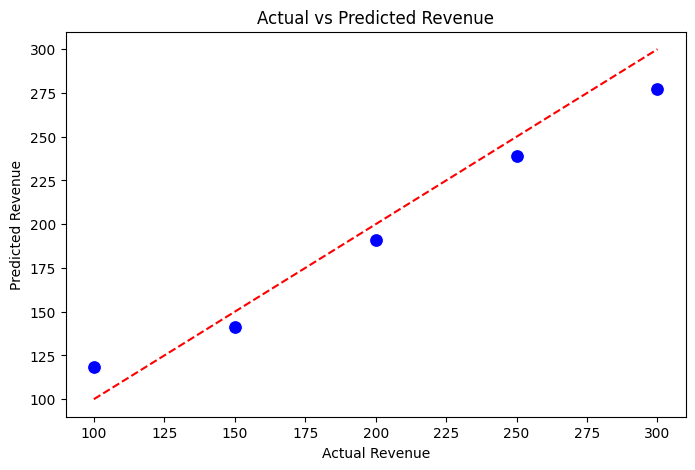

/tmp/ipython-input-3997228829.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


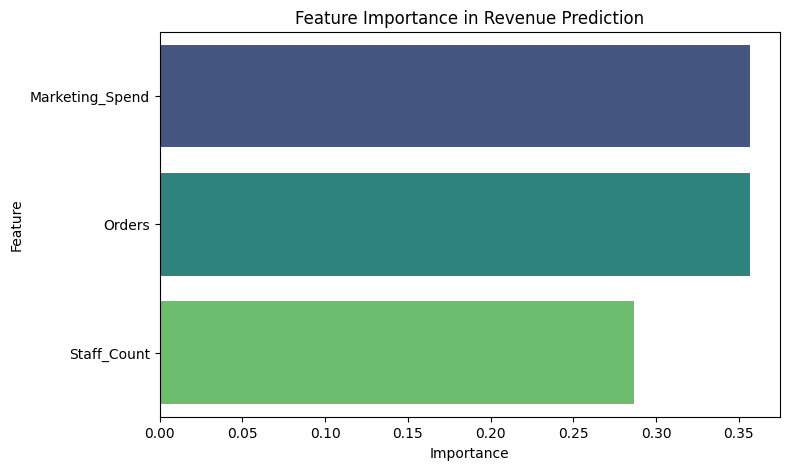

In [ ]:
# =========================
# Smart Insights: Revenue Prediction Visualization
# =========================

# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Step 2: Example dataset
# Replace this with your actual dataset
data = pd.DataFrame({
    'Revenue': [100, 150, 200, 250, 300],
    'Marketing_Spend': [50, 60, 70, 80, 90],
    'Orders': [20, 25, 30, 35, 40],
    'Staff_Count': [5, 6, 7, 8, 9]
})

# Step 3: Prepare features and target
X = data[['Marketing_Spend', 'Orders', 'Staff_Count']]
y = data['Revenue']

# Step 4: Train ML model on entire dataset (since small example)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Step 5: Make predictions for all rows
y_pred = model.predict(X)

# Step 6: Save results to CSV
results = X.copy()
results['Actual_Revenue'] = y.values
results['Predicted_Revenue'] = y_pred
results.to_csv("SME_Revenue_Predictions.csv", index=False)

# Step 7: Plot Actual vs Predicted Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(x=results['Actual_Revenue'], y=results['Predicted_Revenue'], color='blue', s=100)
plt.plot([min(results['Actual_Revenue']), max(results['Actual_Revenue'])],
         [min(results['Actual_Revenue']), max(results['Actual_Revenue'])],
         color='red', linestyle='--')  # ideal line
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs Predicted Revenue")
plt.show()

# Step 8: Feature Importance
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title("Feature Importance in Revenue Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# =========================
# End of Script
# =========================


In [ ]:
import sqlite3
import pandas as pd

# Example Python data
results = pd.DataFrame({
    'Month': ['2025-01', '2025-02', '2025-03'],
    'Actual_Revenue': [100000, 150000, 200000],
    'Predicted_Revenue': [110000, 145000, 210000]
})

feature_df = pd.DataFrame({
    'Feature': ['Marketing_Spend', 'Orders', 'Staff_Count'],
    'Importance': [0.5, 0.3, 0.2]
})

# Connect to SQLite database (creates file if not exists)
conn = sqlite3.connect("SME_Analytics.sqlite")

# Save results to SQL tables
results.to_sql('SME_Revenue_Predictions', con=conn, if_exists='replace', index=False)
feature_df.to_sql('Feature_Importance', con=conn, if_exists='replace', index=False)


3

In [ ]:
# Query all predictions
df_predictions = pd.read_sql("SELECT * FROM SME_Revenue_Predictions", conn)
print(df_predictions)

# Query months where predicted revenue > 200000
high_revenue = pd.read_sql(
    "SELECT Month, Predicted_Revenue FROM SME_Revenue_Predictions WHERE Predicted_Revenue > 200000",
    conn
)
print(high_revenue)

# Query top feature by importance
top_feature = pd.read_sql(
    "SELECT Feature, Importance FROM Feature_Importance ORDER BY Importance DESC LIMIT 1",
    conn
)
print(top_feature)


     Month  Actual_Revenue  Predicted_Revenue
0  2025-01          100000             110000
1  2025-02          150000             145000
2  2025-03          200000             210000
     Month  Predicted_Revenue
0  2025-03             210000
           Feature  Importance
0  Marketing_Spend         0.5


In [ ]:
comparison = pd.read_sql(
    "SELECT Month, Actual_Revenue, Predicted_Revenue, "
    "(Predicted_Revenue - Actual_Revenue) AS Difference "
    "FROM SME_Revenue_Predictions",
    conn
)
print(comparison)


     Month  Actual_Revenue  Predicted_Revenue  Difference
0  2025-01          100000             110000       10000
1  2025-02          150000             145000       -5000
2  2025-03          200000             210000       10000


In [ ]:
total_predicted = pd.read_sql(
    "SELECT SUM(Predicted_Revenue) AS Total_Predicted_Revenue FROM SME_Revenue_Predictions",
    conn
)
print(total_predicted)


   Total_Predicted_Revenue
0                   465000


In [ ]:
import pandas as pd

# Query predictions
df_predictions = pd.read_sql("SELECT * FROM SME_Revenue_Predictions", conn)
print(df_predictions)

# Query feature importance
df_features = pd.read_sql("SELECT * FROM Feature_Importance", conn)
print(df_features)


     Month  Actual_Revenue  Predicted_Revenue
0  2025-01          100000             110000
1  2025-02          150000             145000
2  2025-03          200000             210000
           Feature  Importance
0  Marketing_Spend         0.5
1           Orders         0.3
2      Staff_Count         0.2


In [ ]:
from google.colab import files

# Download predictions
files.download("SME_Revenue_Predictions.xlsx")

# Download feature importance
files.download("Feature_Importance.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files

# Download SQLite database
files.download("SME_Analytics.sqlite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>